In [2]:
pip install ultralytics streamlit opencv-python pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.6/801.6 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import os

In [4]:
from ultralytics import YOLO
import cv2
import numpy as np

# Load the YOLOv8 model
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 74.2MB/s]


# 1. Creating project directories

## 1. Connect to gg drive


In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
data_path = 'drive/MyDrive/Task/Task/Task/3_classes'
os.listdir(data_path)
empty_path = os.path.join(data_path,'Empty')
leopard_path = os.path.join(data_path,'Leopard')
tiger_path = os.path.join(data_path,'Tigers')

## 2. Detect animal from data set and crop it then put it in cropped directory


In [24]:
import os

# Define the base directory
base_dir = 'dataset'
os.makedirs(base_dir, exist_ok=True)

# Define the categories
categories = ['empty', 'leopard', 'tiger']

# Create the directory structure
for category in categories:
    dir_path = os.path.join(base_dir, category)
    os.makedirs(dir_path, exist_ok=True)

print("Directory structure created successfully.")

In [16]:
import shutil
import os

# Define source directories where your images are currently stored
source_dirs = {
    'empty': empty_path,
    'leopard': leopard_path,
    'tiger': tiger_path,
}

# Function to copy images to target directories
def copy_images_to_target(source_dir, target_dir, category):
    target_category_dir = os.path.join(target_dir, category)
    images = os.listdir(source_dir)
    for image_name in images:
        source_path = os.path.join(source_dir, image_name)
        target_path = os.path.join(target_category_dir, image_name)
        # print(target_path)
        shutil.copyfile(source_path, target_path)

# Copy images to the new directory structure
for category, source_dir in source_dirs.items():
      # print(category, source_dir)
      copy_images_to_target(source_dir, base_dir, category)

print("Images moved successfully.")


Images moved successfully.


In [24]:
print(leopard_path)
print(tiger_path)

drive/MyDrive/Task/Task/Task/3_classes/Leopard
drive/MyDrive/Task/Task/Task/3_classes/Tigers


In [25]:
# Create directories for cropped images
os.makedirs('cropped/tiger', exist_ok=True)
os.makedirs('cropped/leopard', exist_ok=True)



In [28]:
# Function to detect and crop animals
def detect_and_crop_animals(img_dir, output_dir, model):
    for img_file in os.listdir(img_dir):
        img_path = os.path.join(img_dir, img_file)
        image = cv2.imread(img_path)

        if image is None:
            print(f"Failed to load image: {img_path}")
            continue

        # results = model(image)
        results = model(image, verbose=False)

        for i, box in enumerate(results[0].boxes):

            if box is None or box.xyxy is None:
                continue

            x1, y1, x2, y2 = map(int, box.xyxy[0])
            cropped_img = image[y1:y2, x1:x2]

            if 'tiger' in img_dir.lower():
                save_path = os.path.join(output_dir, 'tiger', f"{os.path.splitext(img_file)[0]}_{i}.jpg")
                cv2.imwrite(save_path, cropped_img)
            elif 'leopard' in img_dir.lower():
                save_path = os.path.join(output_dir, 'leopard', f"{os.path.splitext(img_file)[0]}_{i}.jpg")
                cv2.imwrite(save_path, cropped_img)


# Detect and crop animals from images in the tiger and leopard directories
detect_and_crop_animals(leopard_path, 'cropped', model)
detect_and_crop_animals(tiger_path, 'cropped', model)

print("Detection and cropping completed.")


Failed to load image: drive/MyDrive/Task/Task/Task/3_classes/Leopard/objects.csv
Failed to load image: drive/MyDrive/Task/Task/Task/3_classes/Tigers/objects.csv
Detection and cropping completed.


In [29]:
# i also store this file on GG drive in case it lost
cropped_file = 'drive/MyDrive/cropped/cropped_images'
os.listdir(cropped_file)

['tiger', 'leopard']

In [41]:
import os
import random
import shutil

cropped_file = 'cropped'
cropped_file_train = 'cropped_train'
cropped_file_test = 'cropped_test'

# Ensure target directories exist
os.makedirs(cropped_file_train, exist_ok=True)
os.makedirs(cropped_file_test, exist_ok=True)

# List subdirectories (tiger, leopard)
subdirs = ['tiger', 'leopard']

for subdir in subdirs:
    subdir_path = os.path.join(cropped_file, subdir)
    train_subdir_path = os.path.join(cropped_file_train, subdir)
    test_subdir_path = os.path.join(cropped_file_test, subdir)

    # Ensure subdirectories exist in train and test directories
    os.makedirs(train_subdir_path, exist_ok=True)
    os.makedirs(test_subdir_path, exist_ok=True)

    # List all files in the subdirectory
    all_files = os.listdir(subdir_path)
    # Shuffle the list of files
    random.shuffle(all_files)

    # Calculate the split point (90% train, 10% test)
    split_point = int(len(all_files) * 0.9)

    # Split the files into train and test sets
    train_files = all_files[:split_point]
    test_files = all_files[split_point:]

    # Copy files to the train subdirectory
    for file in train_files:
        src_path = os.path.join(subdir_path, file)
        dst_path = os.path.join(train_subdir_path, file)
        shutil.copy2(src_path, dst_path)
        os.remove(src_path)

    # Copy files to the test subdirectory
    for file in test_files:
        src_path = os.path.join(subdir_path, file)
        dst_path = os.path.join(test_subdir_path, file)
        shutil.copy2(src_path, dst_path)
        os.remove(src_path)

In [ ]:
import shutil
import zipfile
from google.colab import files

# Define the directory to be zipped
dir_to_zip = 'cropped'

# Define the name of the output zip file
zip_filename = 'cropped_images.zip'

# Create a zip file
shutil.make_archive('cropped_images', 'zip', dir_to_zip)

# Download the zip file
files.download(zip_filename)

print('download completed')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
# Check how many dectected animal in file
print(len(os.listdir('cropped/tiger')), len(os.listdir('cropped/leopard')))
print(len(os.listdir('cropped_test/tiger')), len(os.listdir('cropped_test/leopard')))
print(len(os.listdir('cropped_train/tiger')), len(os.listdir('cropped_train/leopard')))

0 0
305 235
2742 2110


Random Leopard Images:


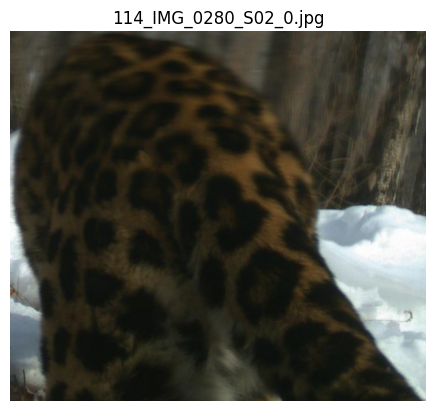

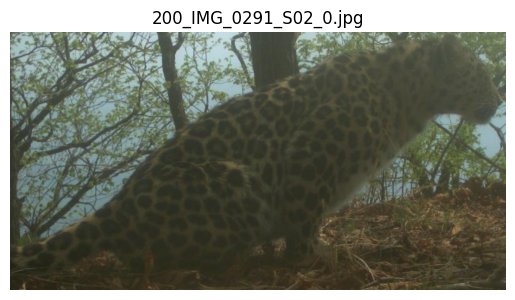

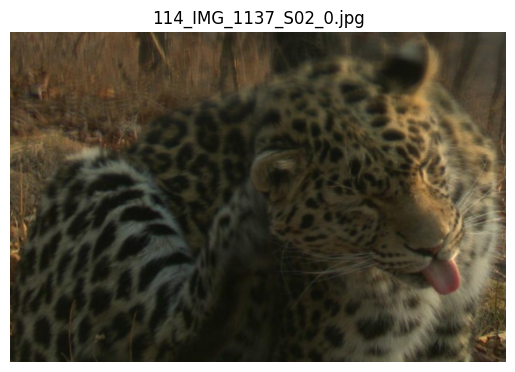

Random Tiger Images:


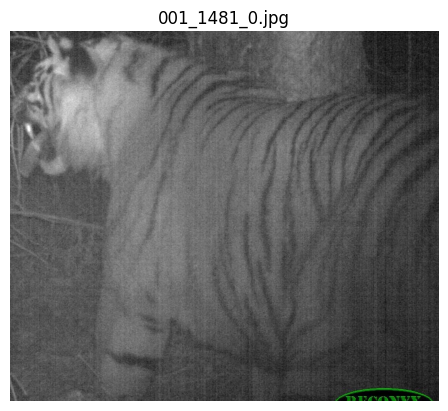

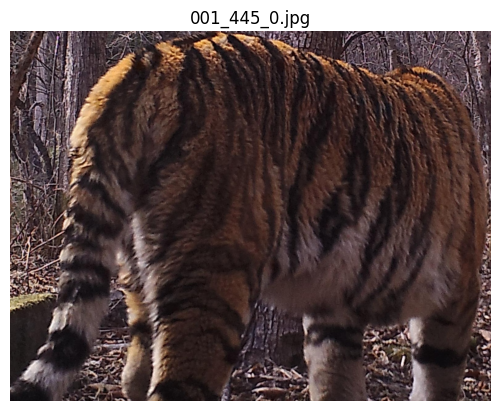

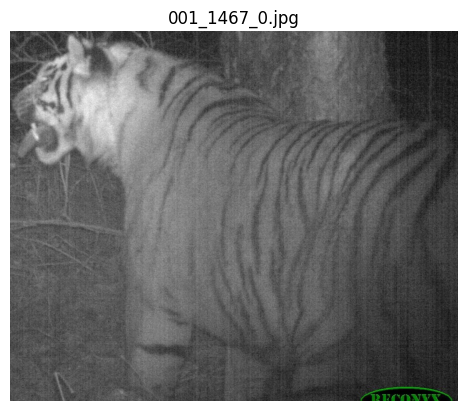

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the paths to the directories
leopard_dir = 'cropped_train/leopard'
tiger_dir = 'cropped_train/tiger'

# Function to display random images
def show_random_images(directory, num_images=3):
    image_files = os.listdir(directory)
    random_files = random.sample(image_files, min(num_images, len(image_files)))

    for file_name in random_files:
        file_path = os.path.join(directory, file_name)
        img = mpimg.imread(file_path)
        plt.imshow(img)
        plt.title(file_name)
        plt.axis('off')
        plt.show()

# Display random images from both directories
print("Random Leopard Images:")
show_random_images(leopard_dir)

print("Random Tiger Images:")
show_random_images(tiger_dir)

# 2. Train model to classify the animal detected is leopard or tiger


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to the directories containing cropped images
base_dir = 'cropped_train'

# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Use 20% of the data for validation
)

# Data augmentation and normalization for validation
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Create training data generator
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

# Create validation data generator
validation_generator = val_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 3882 images belonging to 2 classes.
Found 970 images belonging to 2 classes.


In [ ]:
img_path = '/content/dataset/leopard/01020010_S02.jpg'

## Explain parameter

###horizontal_flip
Horizontal flipping is a data augmentation technique that mirrors an image along its vertical axis. This means that every point on the left side of the image is swapped with the corresponding point on the right side. This operation helps in making the model invariant to horizontal orientations, such as recognizing an object regardless of whether it appears on the left or right side of the image.

#### Mathematical Explanation

Given an image represented by a 2D coordinate system where \( (x, y) \) are the coordinates of a pixel, horizontal flipping can be described mathematically.

1. **Image Dimensions**:
   - Let \( W \) be the width of the image.
   - Let \( H \) be the height of the image.

2. **Original Coordinates**:
   - \( (x, y) \) are the coordinates of the original pixel.

3. **Flipped Coordinates**:
   - The new coordinates \( (x', y') \) after horizontal flipping will be \( (W - x - 1, y) \).

#### Equation

The horizontal flip transformation can be expressed as:

$\
\begin{bmatrix}
x' \\
y'
\end{bmatrix}
=
\begin{bmatrix}
W - x - 1 \\
y
\end{bmatrix}
$

Where:
- \( x' \) is the new x-coordinate after flipping.
- \( y' \) remains the same as \( y \) because the vertical position does not change.

#### Example

Suppose you have a pixel at position \( (x, y) \) in an image of width \( W \):

- Original position: \( (x, y) \)
- Flipped position: \( (W - x - 1, y) \)

For example, in a 5-pixel wide image (\( W = 5 \)):
- A pixel at \( (0, y) \) would move to \( (4, y) \).
- A pixel at \( (1, y) \) would move to \( (3, y) \).
- A pixel at \( (2, y) \) (the center) would stay at \( (2, y) \).
- A pixel at \( (3, y) \) would move to \( (1, y) \).
- A pixel at \( (4, y) \) would move to \( (0, y) \).


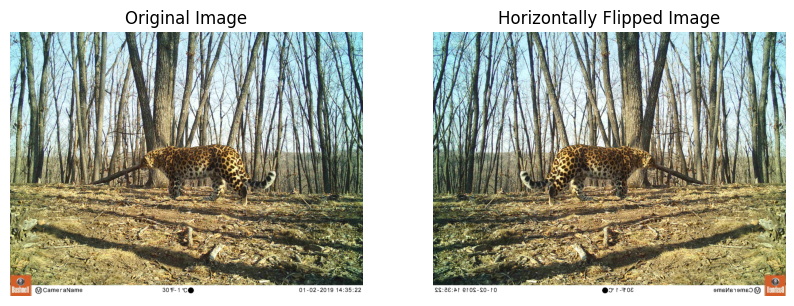

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

img = load_img(img_path)
img_array = img_to_array(img)

# Define the data generator with horizontal flip
datagen = ImageDataGenerator(horizontal_flip=True)

# Generate and plot augmented images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Original image
ax[0].imshow(img_array.astype('uint8'))
ax[0].set_title('Original Image')
ax[0].axis('off')

# Flipped image
flipped_img = datagen.apply_transform(img_array, {'flip_horizontal': True})
ax[1].imshow(flipped_img.astype('uint8'))
ax[1].set_title('Horizontally Flipped Image')
ax[1].axis('off')

plt.show()

#### shear_range:

Shear transformation is a geometric transformation that distorts the shape of an image.

If $(x, y)$ are the original coordinates of a pixel, the sheared coordinates $(x', y')$ are given by:

$\
\begin{bmatrix} x' \\ y' \end{bmatrix} = \begin{bmatrix} 1 & \text{shear} \\ 0 & 1 \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix}
$





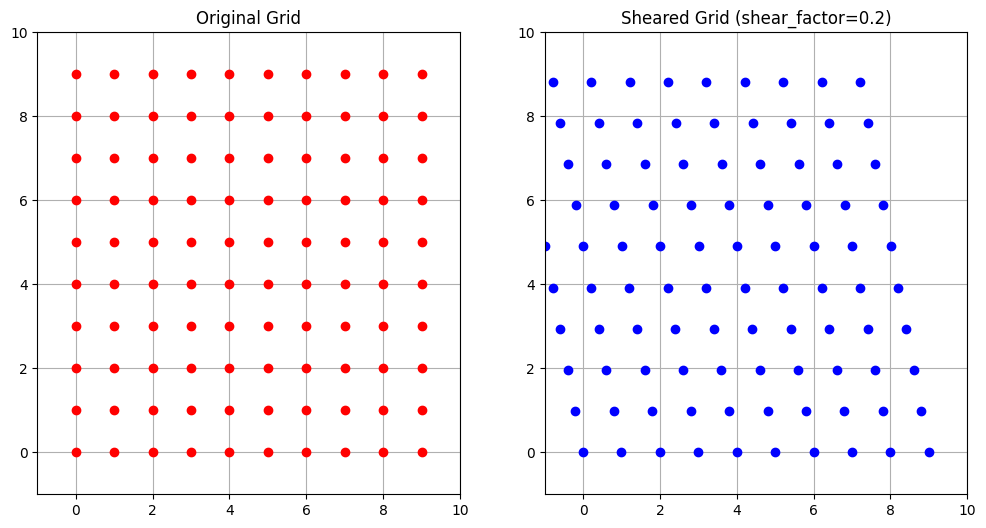

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import warp, AffineTransform

def plot_shear_transformation(shear_factor):
    # Create a grid of points
    coords = np.indices((10, 10)).reshape(2, -1)

    # Apply shear transformation
    transform = AffineTransform(shear=shear_factor)
    transformed_coords = transform(coords.T).T

    # Plot original grid
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].plot(coords[0], coords[1], 'ro')
    ax[0].set_title('Original Grid')
    ax[0].set_xlim(-1, 10)
    ax[0].set_ylim(-1, 10)
    ax[0].grid(True)

    # Plot transformed grid
    ax[1].plot(transformed_coords[0], transformed_coords[1], 'bo')
    ax[1].set_title(f'Sheared Grid (shear_factor={shear_factor})')
    ax[1].set_xlim(-1, 10)
    ax[1].set_ylim(-1, 10)
    ax[1].grid(True)

    plt.show()

# Visualize shear transformation with shear_factor = 0.2
plot_shear_transformation(0.2)


### Zoom Range in Image Data Augmentation

The `zoom_range` parameter in the `ImageDataGenerator` class of Keras is used for data augmentation by applying random zoom transformations to the images. Zooming can either magnify (zoom in) or shrink (zoom out) the content of an image. This helps the model become more robust by learning to recognize objects at different scales.

#### Mathematical Explanation

Given an image, the zoom transformation can be described as scaling the image by a certain factor. The zoom factor is randomly chosen within the range specified by `zoom_range`.

##### Zoom In and Zoom Out

1. **Zoom In**: Enlarging the image.
2. **Zoom Out**: Shrinking the image.

##### Zoom Transformation

For a pixel at coordinates \((x, y)\) in an image of width \(W\) and height \(H\), the coordinates after applying a zoom factor \(z\) are:

$\
\begin{bmatrix}
x' \\
y'
\end{bmatrix}
=
\begin{bmatrix}
x \cdot z \\
y \cdot z
\end{bmatrix}
$

#### `zoom_range` Parameter

- `zoom_range` is a float or a list/tuple of two floats. It defines the range within which the zoom factor is randomly selected.
- If `zoom_range` is a single float, `[1 - zoom_range, 1 + zoom_range]` is used.
- If `zoom_range` is a list or tuple, `[zoom_range[0], zoom_range[1]]` is used.

##### Examples

1. **Single Float**:
   ```python
   datagen = ImageDataGenerator(zoom_range=0.2)


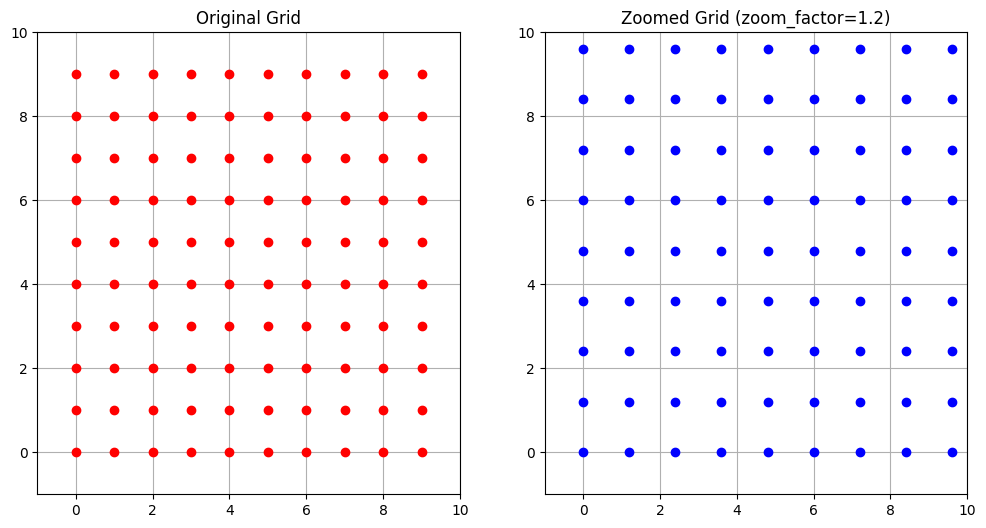

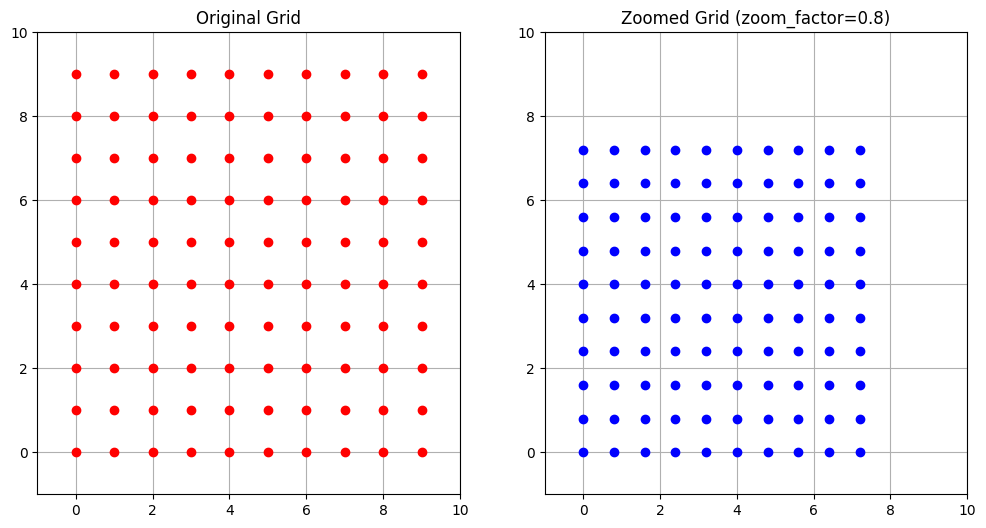

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import warp, AffineTransform

def plot_zoom_transformation(zoom_factor):
    # Create a grid of points
    coords = np.indices((10, 10)).reshape(2, -1)
    coords = coords.T  # Transpose to get coordinates in (x, y) format

    # Apply zoom transformation
    transform = AffineTransform(scale=(zoom_factor, zoom_factor))
    transformed_coords = transform(coords).T

    # Plot original grid
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].plot(coords[:, 0], coords[:, 1], 'ro')
    ax[0].set_title('Original Grid')
    ax[0].set_xlim(-1, 10)
    ax[0].set_ylim(-1, 10)
    ax[0].grid(True)

    # Plot transformed grid
    ax[1].plot(transformed_coords[0], transformed_coords[1], 'bo')
    ax[1].set_title(f'Zoomed Grid (zoom_factor={zoom_factor})')
    ax[1].set_xlim(-1, 10)
    ax[1].set_ylim(-1, 10)
    ax[1].grid(True)

    plt.show()

# Visualize zoom transformation with a zoom factor of 1.2 (zoom in)
plot_zoom_transformation(1.2)

# Visualize zoom transformation with a zoom factor of 0.8 (zoom out)
plot_zoom_transformation(0.8)


## batch_size in Image Data Augmentation

The `batch_size` parameter in the `ImageDataGenerator.flow_from_directory` method defines the number of samples (images) that will be propagated through the network at one time.

#### Usage

- **Parameter**: `batch_size`
- **Type**: Integer
- **Purpose**: Specifies the number of images to process in a single batch during training or validation.



### Batch Size in Machine Learning

The `batch_size` parameter determines the number of samples that will be passed through the network at one time. This process is crucial for training efficiency and stability. Here, we will explain how it affects the gradient computation and model updates.

#### Full Batch Gradient Descent

- **Definition**: Uses the entire dataset to compute the gradient of the loss function and update the model parameters.
- **Gradient Calculation**:
  $\
  \nabla L(\theta) = \frac{1}{N} \sum_{i=1}^{N} \nabla L(f(X_i, \theta), Y_i)
  $
  where  N  is the total number of samples, $ X_i $ are the input samples, $Y_{i} $ are the corresponding labels, $ \theta $ represents the model parameters, and \( L \) is the loss function.
- **Update Rule**:
  $\
  \theta = \theta - \eta \nabla L(\theta)
  $
  where $ \eta\ $ is the learning rate.

#### Mini-Batch Gradient Descent

- **Definition**: Divides the dataset into small batches and updates the model parameters based on each mini-batch.
- **Batch Size**: \( B \) is the number of samples in a mini-batch.
- **Gradient Calculation** for a mini-batch:
  $\
  \nabla L(\theta) = \frac{1}{B} \sum_{i=1}^{B} \nabla L(f(X_{i,B}, \theta), Y_{i,B})
  $
  where $X_{i,B}$ and $ Y_{i,B} $ are the input samples and labels in the mini-batch.
- **Update Rule** for each mini-batch:
  $\
  \theta = \theta - \eta \nabla L(\theta)
  $

#### Example

Suppose you have a dataset of 1000 samples, and you choose a batch size of 32. Here's how mini-batch gradient descent would work:

1. **Divide the Dataset**: Split the dataset into batches of 32 samples each.
   - You will have $\left\lceil \frac{1000}{32} \right\rceil = 32\$ batches.
   
2. **Forward and Backward Pass**:
   - For each batch, compute the predictions and the loss.
   - Calculate the gradient of the loss with respect to the model parameters using only the samples in the current batch.
   - Update the model parameters using these gradients.

3. **Update Rule**:
   $\
   \theta = \theta - \eta \left( \frac{1}{32} \sum_{i=1}^{32} \nabla L(f(X_{i,B}, \theta), Y_{i,B}) \right)
   $


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # binary classification
])


## CNN Model Architecture

The following is a detailed explanation of each layer in the Convolutional Neural Network (CNN) model built using Keras, along with the mathematical explanations.

### 1. Convolutional Layer (Conv2D)

**Mathematics**:
- The convolution operation involves a filter (kernel) sliding over the input image and computing the dot product.
- **Formula**:

  The operation can be expressed as:

$\
\text{Output}(i, j, k) = \text{ReLU} \left( \sum_{m=0}^{M-1} \sum_{n=0}^{N-1} \sum_{c=0}^{C-1} \text{Input}(i+m, j+n, c) \cdot \text{Kernel}(m, n, c, k) + \text{Bias}(k) \right)
$

Where:


  Where:
  - $\text{Input}(i, j, c) $ is the input value at position $(i, j)$ for channel \(c\).
  - $\text{Kernel}(m, n, c, k) $ is the filter weight at position (m, n) for channel c and filter k.
  - $\text{Bias}(k) $ is the bias term for filter k.
  - $ M \times N $ is the filter size.
  - $C$ is the number of input channels.
  - $K$ is the number of filters.
  - $ \text{ReLU}(x) = \max(0, x)  $ is the ReLU activation function.

**In the Model**:
```python
Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))
Conv2D(64, (3, 3), activation='relu')
Conv2D(128, (3, 3), activation='relu')
```
we can say:
```python
def relu(x):
    return np.maximum(0, x)

def conv2d(input, kernel, bias):
    # Get dimensions
    input_height, input_width, input_channels = input.shape
    kernel_height, kernel_width, _, num_kernels = kernel.shape

    # Calculate output dimensions
    output_height = input_height - kernel_height + 1
    output_width = input_width - kernel_width + 1

    # Initialize output
    output = np.zeros((output_height, output_width, num_kernels))

    # Perform convolution
    for k in range(num_kernels):
        for i in range(output_height):
            for j in range(output_width):
                for m in range(kernel_height):
                    for n in range(kernel_width):
                        for c in range(input_channels):
                            output[i, j, k] += input[i + m, j + n, c] * kernel[m, n, c, k]
                output[i, j, k] += bias[k]
                
    return relu(output)



Let's assume the input size is:

$\
\text{Input} = (H, W, C)
$

  Where:\
    H  is the height of the input feature map.\
    W is the width of the input feature map.\
    C is the number of channels in the input feature map.

Output Size

The output size of the convolution operation (before applying the ReLU activation) can be calculated using the following formulas:

$\
\text{Output Height} = \left\lfloor \frac{H - M + 2P}{S_H} \right\rfloor + 1
$

$\
\text{Output Width} = \left\lfloor \frac{W - N + 2P}{S_W} \right\rfloor + 1
$

The depth of the output feature map will be equal to the number of filters $K$.\


Example Calculation:

Assume the following values:

    Input size: H = 150, W = 150, C = 3
    Kernel size: M = 3, N = 3
    Stride: S_H = S_W = 1
    Padding: P = 0 (no padding)
    Number of filters: K = 32


The output size will be:

$\
\text{Output Height} = \left\lfloor \frac{150 - 3 + 0}{1} \right\rfloor + 1 = \left\lfloor 147 \right\rfloor + 1 = 148
$

$\
\text{Output Width} = \left\lfloor \frac{150 - 3 + 0}{1} \right\rfloor + 1 = \left\lfloor 147 \right\rfloor + 1 = 148
$

$\
\text{Output Depth} = K = 32
$

So, the output size is:

$\
\text{Output} = (148, 148, 32)
$


### 2. Max Pooling Layer (MaxPooling2D)

**Mathematics**:

Max pooling reduces the spatial dimensions of the input.

**Formula**:
$\
Output(i,j,c) = max_{0 ≤ m < M, 0 ≤ n < N} Input(i * S_H + m, j * S_W + n, c)
$
Where:
- $Output(i,j,c)$ is the value of the output feature map at position (i,j) in channel c.
- $Input(i * S_H + m, j * S_W + n, c)$ are the input values within the pooling window.
- M and N are the height and width of the pooling window.
- $S_H$ and $S_W$ are the vertical and horizontal strides.
- m and n iterate over the pooling window.

**In the Model**:

```python
MaxPooling2D((2, 2))


In [ ]:
import numpy as np

# Define the input matrix
input_matrix = np.array([
    [1, 3, 2, 4],
    [5, 6, 1, 2],
    [1, 2, 3, 4],
    [5, 1, 2, 3]
])

# Define the pooling size and stride
pool_size = 2
stride = 2

# Get input dimensions
H, W = input_matrix.shape

# Calculate output dimensions
output_height = (H - pool_size) // stride + 1
output_width = (W - pool_size) // stride + 1

# Initialize the output matrix
output_matrix = np.zeros((output_height, output_width))

# Perform max pooling
for i in range(output_height):
    for j in range(output_width):
        # Define the pooling region
        vertical_start = i * stride
        vertical_end = vertical_start + pool_size
        horizontal_start = j * stride
        horizontal_end = horizontal_start + pool_size

        # Apply max pooling
        pooling_region = input_matrix[vertical_start:vertical_end, horizontal_start:horizontal_end]
        output_matrix[i, j] = np.max(pooling_region)

print("Input Matrix:\n", input_matrix)
print("Output Matrix after MaxPooling2D:\n", output_matrix)


Input Matrix:
 [[1 3 2 4]
 [5 6 1 2]
 [1 2 3 4]
 [5 1 2 3]]
Output Matrix after MaxPooling2D:
 [[6. 4.]
 [5. 4.]]


### 3. Flatten Layer (Flatten)

**Mathematics**:

Flattening transforms the 2D matrix data into a 1D vector.


**In the Model**:

```python
Flatten()


### 4. Fully Connected Layer (Dense)

**Mathematics**:

Fully connected layers compute the weighted sum of inputs plus a bias term.

**Formula**:

$\
\text{Output}(j) = \text{Activation} \left( \sum_{i=0}^{N-1} \text{Input}(i) \cdot \text{Weight}(i, j) + \text{Bias}(j) \right)
$

Where:
- $\text{Input}(i) $ is the \(i\)-th input.
- $\text{Weight}(i, j) $ is the weight from the \(i\)-th input to the \(j\)-th neuron.
- $\text{Bias}(j)$ is the bias term for the \(j\)-th neuron.
- $\text{Activation}$ is the activation function (ReLU in this case).

**In the Model**:

```python
Dense(512, activation='relu')


Weight and bias are learning during training model, in the beginning it maybe a random thing, but it learning and learning to minimize the loss function. Example if we take loss function is binary_crossentropy then the problem we need to solve is to minimize the binary cross-entropy loss with respect to the weights  $W$ and biases $b$, we can express the optimization problem as follows:

$\
\min_{W, b} \frac{1}{N} \sum_{i=1}^{N} \left[ -y^{(i)} \log \left( f \left( x^{(i)}; W, b \right) \right) - \left( 1 - y^{(i)} \right) \log \left( 1 - f \left( x^{(i)}; W, b \right) \right) \right]
$

Where:

- $W$ are the weights.
- $b$ are the biases.
- $N$ is the number of training examples.
- $y^{(i)}$ is the target output for the \( i \)-th example.
- $x^{(i)}$ is the input for the \( i \)-th example.
- $f \left( x^{(i)}; W, b \right) $ is the predicted probability for the i-th example.

### 5. Dropout Layer (Dropout)
#### How Dropout Works

##### During Training:

1. For each training iteration, dropout randomly selects a subset of neurons and sets their output to zero. This is done independently for each forward pass.
2. The probability of each neuron being dropped is determined by the dropout rate. In this case, `dropout(0.5)` means there is a 50% chance that each neuron will be dropped.
3. The remaining neurons that are not dropped have their outputs scaled up by $\frac{1}{1 - \text{dropout rate}}$  (i.e., scaled by 2 in the case of a dropout rate of 0.5). This scaling ensures that the expected sum of the inputs remains the same during training.

##### During Inference (Testing):

- Dropout is turned off during inference. All neurons are active, and their outputs are not scaled.

**Mathematics**:

Dropout randomly sets a fraction of input units to zero during training to prevent overfitting.

**Formula**:

$\
\text{Output}(i) =
\begin{cases}
\text{Input}(i) * \frac{1}{1 - \text{dropout rate}} & \text{with probability } (1 - p) \\
0 & \text{with probability } p
\end{cases}
$

Where:
- $p$ is the dropout rate (0.5 in this case).

**In the Model**:

```python
Dropout(0.5)


### 6. Output Layer (Dense)

**Mathematics**:

The output layer uses the sigmoid activation function for binary classification.

**Formula**:

$
\text{Output} = \sigma \left( \sum_{i=0}^{N-1} \text{Input}(i) \cdot \text{Weight}(i) + \text{Bias} \right)
$

Where:
$\
\sigma(x) = \frac{1}{1 + e^{-x}}
$
is the sigmoid function.


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20
)


NameError: name 'model' is not defined

### Model Compilation

**Mathematics**:

When compiling a neural network model, we need to specify the optimizer, loss function, and metrics to use during training.

#### 1. Optimizer: Adam

Adam (Adaptive Moment Estimation) is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iteratively based on training data.

**Formula**:

Adam uses estimates of the first and second moments of the gradients to adapt the learning rate for each weight of the neural network.

$\
m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t
$
$\
v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2
$
$\
\hat{m}_t = \frac{m_t}{1 - \beta_1^t}
$
$\
\hat{v}_t = \frac{v_t}{1 - \beta_2^t}
$
$\
\theta_t = \theta_{t-1} - \eta \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}
$

Where:
- $m_t$ and $v_t$ are the estimates of the first moment (mean) and the second moment (uncentered variance) of the gradients respectively.
- $\beta_1$ and  $\beta_2$ are hyperparameters that control the exponential decay rates of these moving averages.
- $g_t$ is the gradient at time step $t$.
- $\eta$ is the learning rate.
- $\epsilon$ is a small constant to prevent division by zero.

#### 2. Loss Function: Binary Crossentropy

Binary crossentropy is used as the loss function for binary classification tasks.

**Formula**:

$\
\text{Loss} = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right]
$

Where:
- $N$ is the number of samples.
- $y_i$ is the true label of the \( i \)-th sample.
- $p_i$ is the predicted probability of the \( i \)-th sample belonging to class 1.

#### 3. Metrics: Accuracy

Accuracy is used as a metric to evaluate the performance of the model.

**Formula**:

$\
\text{Accuracy} = \frac{1}{N} \sum_{i=1}^{N} \mathbf{1} \left( \hat{y}_i = y_i \right)
$

Where:
- $ N $ is the number of samples.
- $\hat{y}_i $ is the predicted label of the $i$-th sample.
- $y_i$ is the true label of the $i$-th sample.
-  $\mathbf{1} \left( \cdot \right)$ is the indicator function that returns 1 if the argument is true and 0 otherwise.

**In the Model**:

```python
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {val_accuracy:.2f}')


31/31 [==============================] - 24s 752ms/step - loss: 0.1722 - accuracy: 0.9515
Validation Accuracy: 0.95


In [ ]:
# Save the trained model
model.save('tiger_leopard_classifier1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
classifier = tf.keras.models.load_model('tiger_leopard_classifier1.h5')

Found 540 images belonging to 2 classes.
Found 540 images belonging to 2 classes.
17/17 [==============================] - 12s 681ms/step
True labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

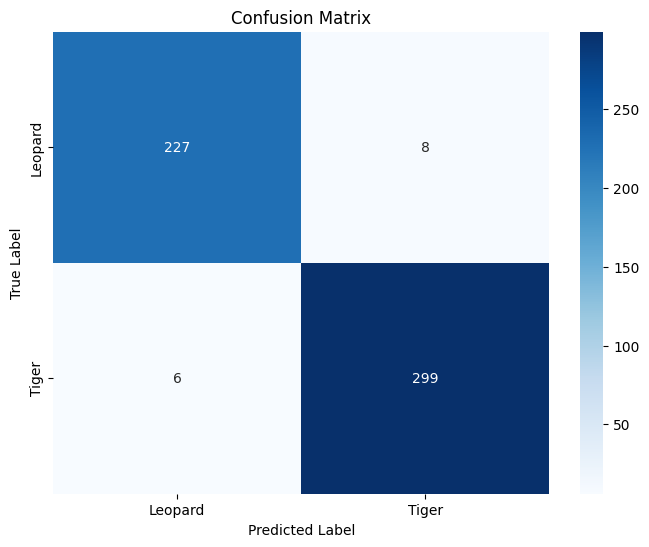

              precision    recall  f1-score   support

     Leopard       0.97      0.97      0.97       235
       Tiger       0.97      0.98      0.98       305

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the test data directory
test_dir = 'cropped_test'

# Create an ImageDataGenerator for the test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Generate test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  # Resize images to match input size of the model
    batch_size=32,
    class_mode='binary',  # Use 'binary' if you have two classes, or 'categorical' for multiple classes
    shuffle=False  # Do not shuffle data for evaluation
)

# Verify the generator
print(f"Found {test_generator.samples} images belonging to {test_generator.num_classes} classes.")

# Generate predictions using the trained model
predictions = classifier.predict(test_generator)

# Convert predictions to binary class labels
y_pred = (predictions > 0.5).astype(int).flatten()

# Get true labels from the test generator
y_true = test_generator.classes

# Ensure y_true and y_pred have the same length
assert len(y_true) == len(y_pred), "Mismatch in length between y_true and y_pred"

# Print some information for verification
print("True labels:", y_true)
print("Predicted labels:", y_pred)

# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Leopard', 'Tiger'], yticklabels=['Leopard', 'Tiger'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_true, y_pred, target_names=['Leopard', 'Tiger']))


#### Metrics Calculation

From the confusion matrix, we can calculate various performance metrics:

- **Accuracy**: The proportion of correctly classified instances out of the total instances.
  $\
  \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{227 + 299}{227 + 299 + 8 + 6} = \frac{526}{540} \approx 0.9741 \ (\text{97.41%})
  $

- **Precision for Leopard**: The proportion of predicted positive instances that are actually positive.
  $\
  \text{Precision (Leopard)} = \frac{TP}{TP + FP} = \frac{227}{227 + 6} = \frac{227}{233} \approx 0.9742 \ (\text{97.42%})
  $

- **Recall for Leopard**: The proportion of actual positive instances that are correctly predicted.
  $\
  \text{Recall (Leopard)} = \frac{TP}{TP + FN}= \frac{227}{227 + 8} = \frac{227}{235} \approx 0.9659 \ (\text{96.59%})
  $

- **F1-Score for Leopard**: The harmonic mean of precision and recall.
  $\
  \text{F1-Score (Leopard)} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} = 2 \times \frac{0.9742 \times 0.9659}{0.9742 + 0.9659} \approx 0.9700 \ (\text{97.00%})
  $

Similar calculations can be done for the class "Tiger".

### Summary

- **High Accuracy**: The model achieves a high accuracy of approximately 97.41%, indicating it is performing well overall.
- **Precision and Recall for Leopard**: Both precision and recall are high for the leopard class (approximately 97.42% and 96.59%, respectively), suggesting that the model is good at identifying leopards and has a low false positive and false negative rate for this class.
- **Precision and Recall for Tiger**: While not explicitly calculated above, the values for tigers can be inferred to be similarly high due to the symmetry of the confusion matrix.

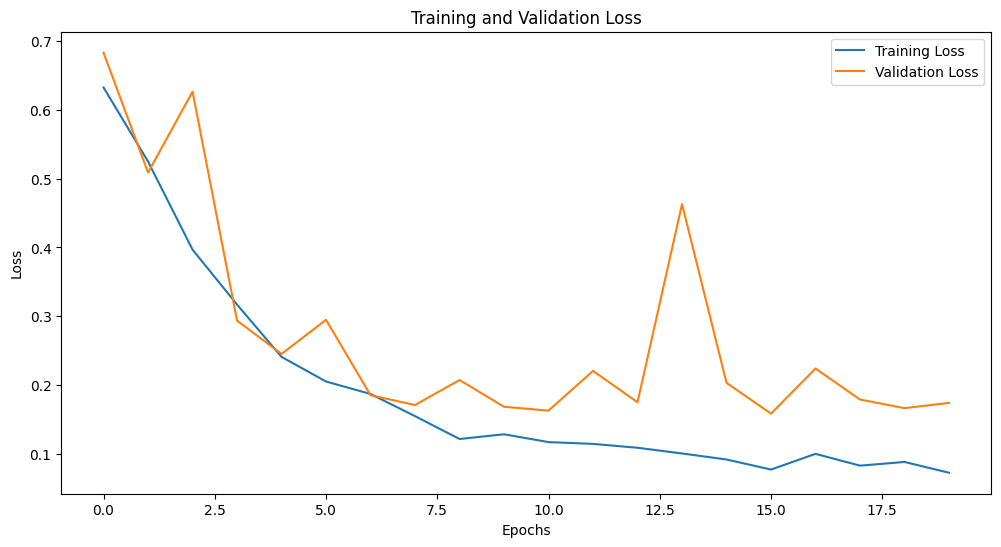

In [ ]:
import matplotlib.pyplot as plt

# Assuming history is the variable storing the training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


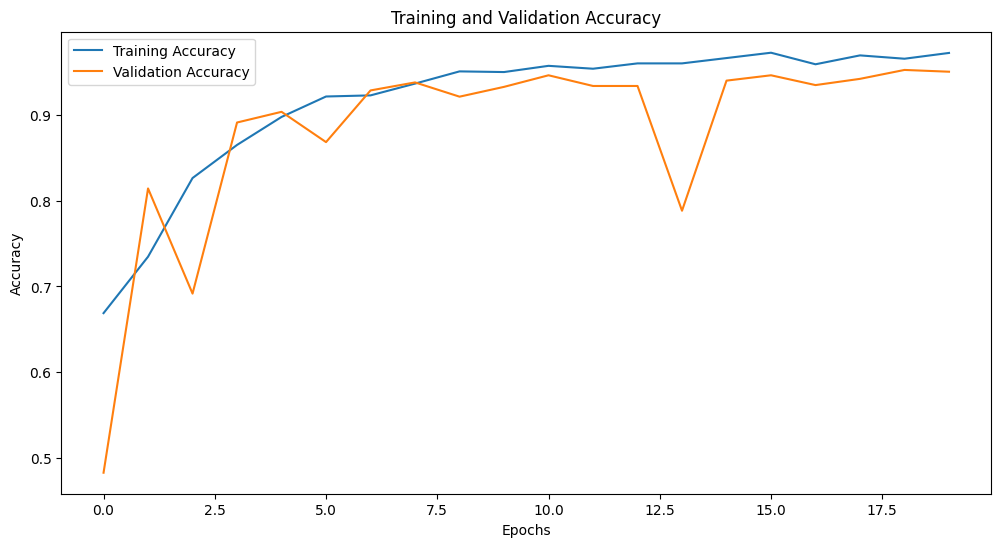

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


17/17 [==============================] - 15s 856ms/step


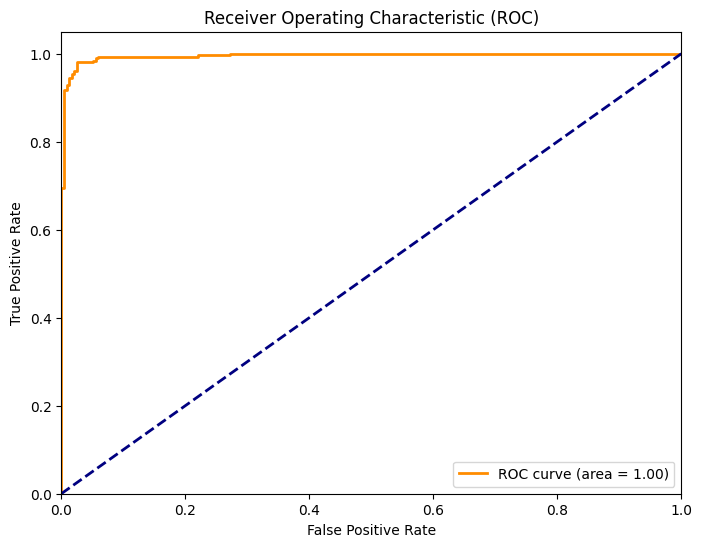

In [ ]:
from sklearn.metrics import roc_curve, auc

y_scores = classifier.predict(test_generator)

fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
